In [1]:
# Plot style
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Latin Modern"
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.major.size"] = 3
plt.rcParams["ytick.major.size"] = 3


In [2]:
# Load data
import json

with open("../../data/gpt_4-1_nano/mmlu/original.json") as file:
    original_data = json.load(file)

with open("../../data/gpt_4-1_nano/mmlu/lexical/random.json") as file:
    random_data = json.load(file)

with open("../../data/gpt_4-1_nano/mmlu/lexical/synonym.json") as file:
    synonym_data = json.load(file)

with open("../../data/gpt_4-1_nano/mmlu/lexical/wrong_sense.json") as file:
    wrong_sense_data = json.load(file)

with open("../../data/gpt_4-1_nano/mmlu/lexical/worst_sense.json") as file:
    worst_sense_data = json.load(file)

with open("../../data/gpt_4-1_nano/mmlu/lexical/llm_synonym.json") as file:
    llm_synonym_data = json.load(file)

with open("../../data/gpt_4-1_nano/mmlu/paraphrase/paraphrase.json") as file:
    paraphrase_data = json.load(file)

# Comparison of rule-based perturbation to random perturbation

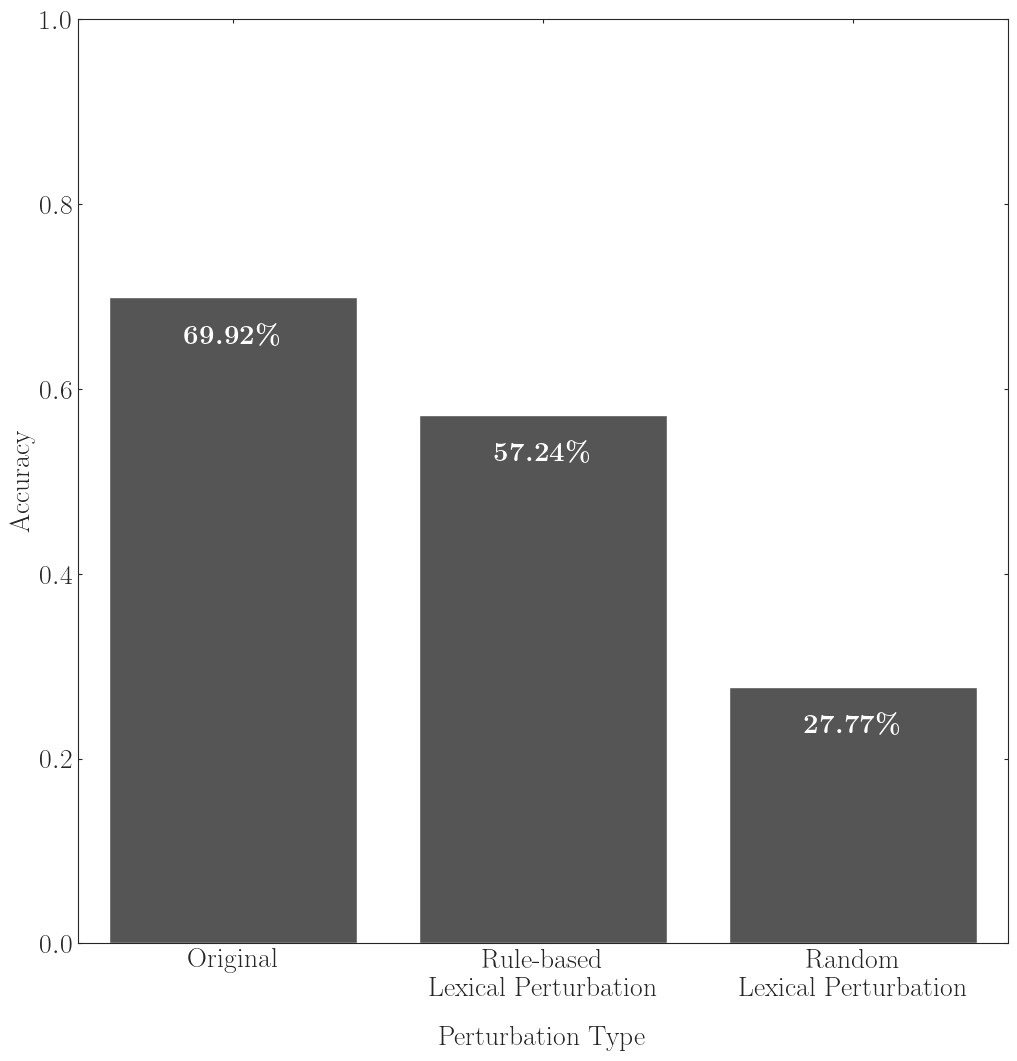

In [3]:
x_axis_labels = ["Original", "Rule-based\nLexical Perturbation", "Random\nLexical Perturbation"]
metrics = [
    original_data["metrics"]["exact_match"],
    synonym_data["metrics"]["exact_match"],
    random_data["metrics"]["exact_match"]
]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
barplot = sns.barplot(x=range(len(x_axis_labels)), y=metrics, color="#555555", ax=ax)
barplot.set_xticks(range(len(x_axis_labels)))
barplot.set_xticklabels(x_axis_labels, rotation=0, ha="center")
for bar, v in zip(barplot.patches, metrics):
    barplot.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.03,   # a little inside the bar
        f"\\textbf{{{v*100:.2f}\\%}}",
        ha="center",
        va="top",
        fontweight="bold",
        color="white",
        clip_on=True
    )

plt.ylim(0, 1)
plt.xlabel("Perturbation Type", labelpad=18)
plt.ylabel("Accuracy")
plt.title("")
plt.show()

fig = barplot.get_figure()
fig.tight_layout()
fig.savefig("../../figs/rule_based_vs_random.pdf", dpi=300)

# Comparison of LLM-based perturbation to rule based perturbation

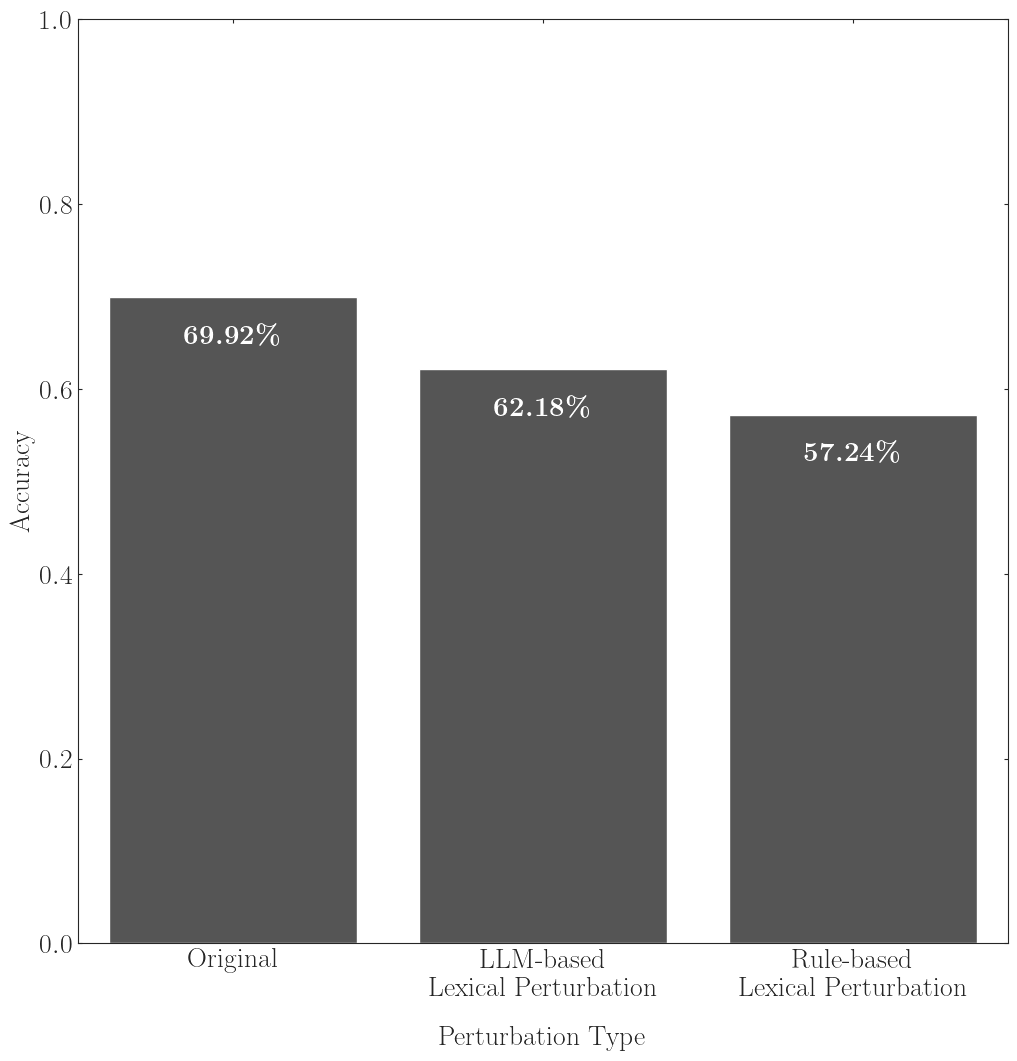

In [4]:
x_axis_labels = ["Original", "LLM-based\nLexical Perturbation", "Rule-based\nLexical Perturbation"]
metrics = [
    original_data["metrics"]["exact_match"],
    llm_synonym_data["metrics"]["exact_match"],
    synonym_data["metrics"]["exact_match"],
]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
barplot = sns.barplot(x=range(len(x_axis_labels)), y=metrics, color="#555555", ax=ax)
barplot.set_xticks(range(len(x_axis_labels)))
barplot.set_xticklabels(x_axis_labels, rotation=0, ha="center")
for bar, v in zip(barplot.patches, metrics):
    barplot.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.03,   # a little inside the bar
        f"\\textbf{{{v*100:.2f}\\%}}",
        ha="center",
        va="top",
        fontweight="bold",
        color="white",
        clip_on=True
    )

plt.ylim(0, 1)
plt.xlabel("Perturbation Type", labelpad=18)
plt.ylabel("Accuracy")
plt.title("")
plt.show()

fig = barplot.get_figure()
fig.tight_layout()
fig.savefig("../../figs/llm_vs_rule_based.pdf", dpi=300)